# Land classification

In this notebook we will explore some techniques for classifying land-cover in satellite images. Using data from the European Space Agency's Sentinel 2 Mission, you will apply machine learning algorithms for identifying areas of vegetation in an urban area.

## Satellite images

The Sentinel-2 satellites are 'Multi Spectral Imaging' Satellites. This means that

- some description of the dataset/links to sentinel/ orbit info

## Why classify land cover?

many reasons:

- in this project to identify areas of vegetation within an Urban environment


In [16]:
# Import important packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
from sklearn import preprocessing as pp
from sklearn import cluster as clstr

## The dataset
The data are provided as atmospherically-corrected values. The dataset is a 3D array of size 1000 x 1000 x 4, providing you with 4 bands: Blue, Green, Red, Infrared. We first need to load this as a NumPy array

In [27]:
im1 = np.load('data/satellite_data.npy')

In [6]:
def calculate_NDVI(image):
    """ This function calculates the Normalised Differential Vegetation Index for
    the 4-band data provided in this exercise. A 2D array is returned"""
    r = image[:,:,2]
    ir = image[:,:,3]
    return (ir-r)/(ir+r)

In [7]:
def image_histogram_equalization(image):
    """ Image histogram equlisation"""
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), 256, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = (255-1) * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape)

## RGB images
What does this mean?
Can you identify different areas manually?
What area are you looking at?


Clue: the image is located somewhere in this area: https://tinyurl.com/yb43aerz

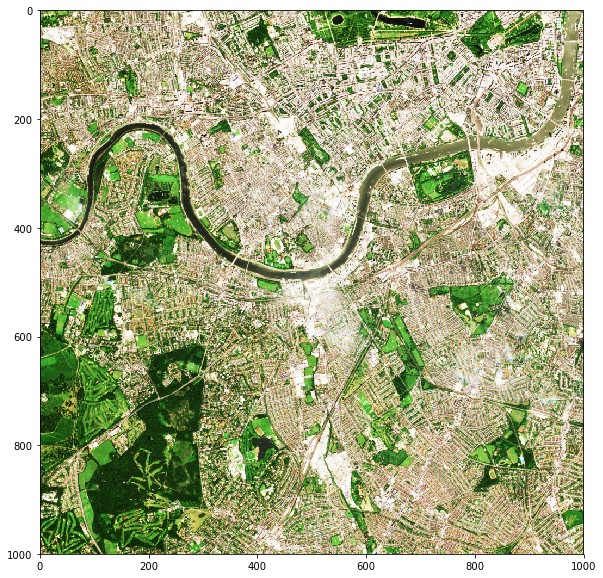

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(image_histogram_equalization(im1[:,:,:3][:,:,::-1]).astype('uint8'))
plt.show()

What features are present?
Can we work out how much green space there is from the RGB information?

# Individual colour channels

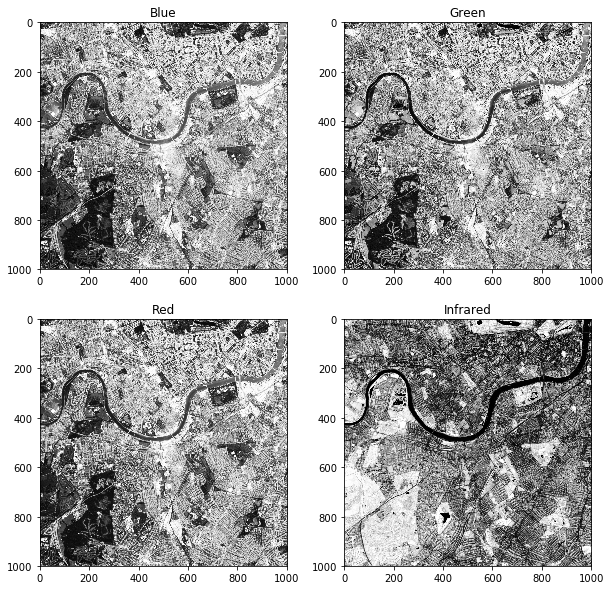

In [24]:
f = plt.figure(figsize=(10,10))
f.add_subplot(221)
plt.imshow(image_histogram_equalization(im1[:,:,0]),'binary_r')
plt.title('Blue')
f.add_subplot(222)
plt.imshow(image_histogram_equalization(im1[:,:,1]),'binary_r')
plt.title('Green')
f.add_subplot(223)
plt.imshow(image_histogram_equalization(im1[:,:,2]),'binary_r')
plt.title('Red')
f.add_subplot(224)
plt.imshow(image_histogram_equalization(im1[:,:,3]),'binary_r')
plt.title('Infrared')
plt.show()

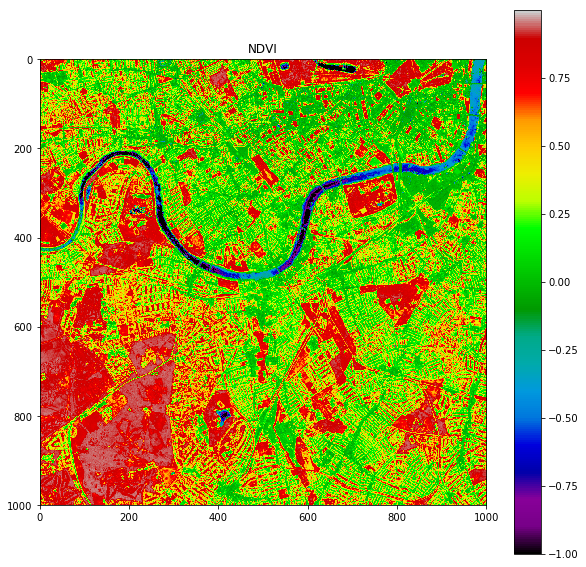

In [30]:
# calculate NDVI
ndvi = calculate_NDVI(im1)

plt.figure(figsize=(10,10))
plt.imshow(ndvi,'nipy_spectral')
plt.title('NDVI')
plt.colorbar()
plt.show()

Why is the water so easy to identify using NDVI?

How could we estimate the area of vegetation?

## Thresholding

In [31]:
# quick demo on numpy indexing

## Ground Truth

What does this mean?
streetview?
